#                          *Prediction using supervised Machine Learning in Python*


###   The following assignmnet/project is created as a part of the Internship Program with Sparks GRIP(Graduate Rotational Internship Program)

####  we start the problem by defining a Hypothesis statement 
####  Hypothesis : Predict the percentage of an student based on the no. of study hours.

In [1]:
import os 
os.getcwd()
print('os imported')

os imported


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print('All necessary modules are imported')

All necessary modules are imported


In [3]:
link = "http://bit.ly/w-data"
df = pd.read_csv(link)
print('Data Loaded')

Data Loaded


In [4]:
df.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [5]:
df.tail(2)

,Hours,Scores
23,6.9,76
24,7.8,86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.shape

(25, 2)

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Visuilization of Data

Text(0.5, 1.0, 'Distribution Plot of Hours')

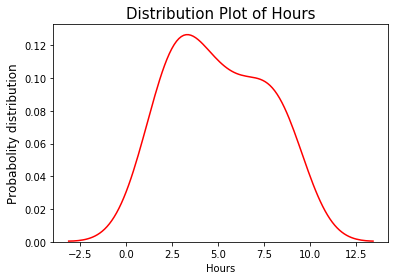

In [9]:
sns.distplot(df.Hours , color = 'r' , hist = False)
plt.ylabel('Probabolity distribution' , fontsize = 12)
plt.title('Distribution Plot of Hours' , fontsize = 15)

Text(0.5, 1.0, 'Distribution Plot of Hours')

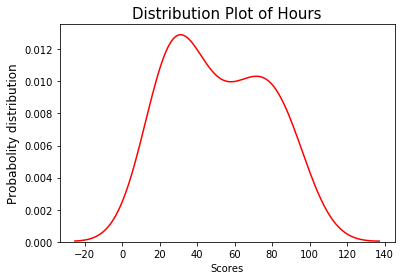

In [10]:
sns.distplot(df.Scores , color = 'r' , hist = False)
plt.ylabel('Probabolity distribution' , fontsize = 12)
plt.title('Distribution Plot of Hours' , fontsize = 15)

In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Correleation

In [12]:
correleation_test = df.corr( method = 'pearson')
correleation_test

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Text(0.5, 1.0, 'Correlation')

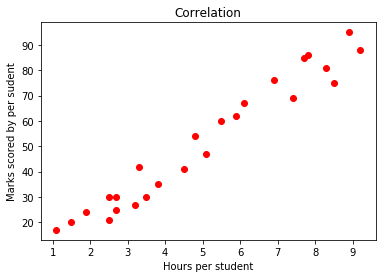

In [13]:
cor_graph = plt.scatter(x = df.Hours , y = df.Scores , color = 'r')
plt.xlabel('Hours per student')
plt.ylabel('Marks scored by per sudent')
plt.title('Correlation')

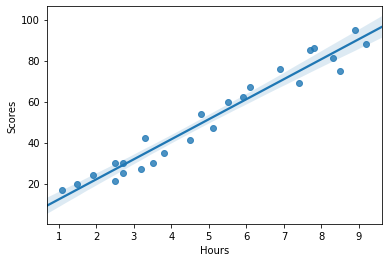

In [14]:
reg_plot =  sns.regplot(x = df.Hours , y = df.Scores)

# findinngs from correlation 

* Linearity can be visuilzed by graphically using **scatterplot** 

* statistically can me measured using three methods
    * **pearson**    : standard correlation coefficient
    * **kendall**    : Kendall Tau correlation coefficient
    * **spearman**   : Spearman rank correlation


* Here i used the Standard correleation coefficient (*Pearson*) to measure the linear relation between the independent(*Hours*) and dependent variable(*Scores*)

* Hence Here Hours in Positively correlated with Score and with a degree of **0.976191**

* The Graphs shwows that thera is a strong linear relationship exists between the variables and it is **Linearly Releated**




In [15]:
X = np.array(df[['Hours']])
y = np.array(df[['Scores']])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X , y , test_size = 0.3 , random_state = 123)


In [17]:
print('The length of the Training set is' , len(X_train))
print('The length of the Testing set is' , len(X_test))

The length of the Training set is 17
The length of the Testing set is 8


In [18]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)


# Coefficient caluclultion

In [20]:
print('The Intercept of the model is', lr.intercept_)
print('The Coefficient of the model is', lr.coef_)

The Intercept of the model is [2.42454812]
The Coefficient of the model is [[9.58736251]]


# Predictions

In [21]:
y_pred = lr.predict(X_test)
y_pred

array([[16.80559189],
       [48.44388816],
       [38.85652565],
       [60.90745942],
       [87.75207444],
       [81.99965694],
       [55.15504192],
       [58.98998692]])

# computing RMSE and R^2 Error

In [22]:
from sklearn.metrics import mean_squared_error , r2_score
mse  = mean_squared_error(y_test , y_pred)


In [23]:
rsquared = r2_score(y_test , y_pred)

In [24]:
print('The Mean square Error of the model is ' , mse)
print('The R2_score of the model is ' , rsquared)

The Mean square Error of the model is  22.391499897257958
The R2_score of the model is  0.9549410139157178


# Actual vs Predicted

Text(0, 0.5, 'Scores')

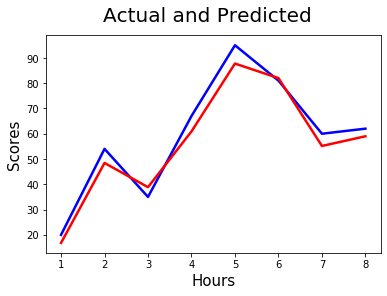

In [25]:

c = [i for i in range(1 , 9 , 1)]
fig = plt.figure()

plt.plot(c, y_test , color = 'b' , linewidth = 2.5 , linestyle ='-')
plt.plot(c, y_pred , color = 'r' , linewidth = 2.5 , linestyle ='-')

fig.suptitle('Actual and Predicted' , fontsize = 20)
plt.xlabel("Hours" , fontsize = 15)
plt.ylabel("Scores" , fontsize = 15)

# Error Terms

Text(0, 0.5, 'Scores')

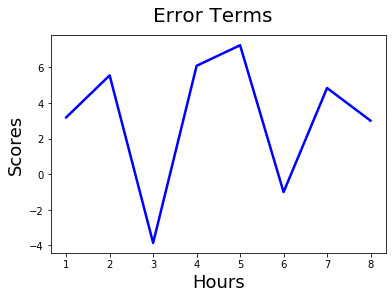

In [26]:
# Plotting the Residuals of the Data

c = [i for i in range(1 , 9 , 1)]
fig = plt.figure()

plt.plot(c, y_test - y_pred , color = 'b' , linewidth = 2.5 , linestyle ='-')

fig.suptitle('Error Terms' , fontsize = 20)
plt.xlabel("Hours" , fontsize = 18)
plt.ylabel("Scores" , fontsize = 18)

# Normality test

Text(0.5, 1.0, 'Distribution of Residuals ')

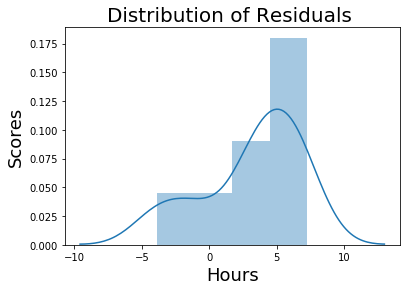

In [27]:
# Plotting the Error terms  or Residuals to see the Distribution of the Data
sns.distplot(y_test - y_pred)
plt.xlabel("Hours", fontsize = 18)
plt.ylabel("Scores" , fontsize = 18)
plt.title('Distribution of Residuals ' ,fontsize = 20)

# student studies for 9.25hours/day?

In [28]:
Hours = np.array([9.25]).reshape(-1,1)
predict_score = lr.predict(np.array(Hours))

In [29]:
predict_score

array([[91.10765132]])

In [30]:
y_sample = (lr.coef_ * 9.25) + lr.intercept_
y_sample

array([[91.10765132]])

In [31]:
print('The score of the studnet if he studies for 9.25 hours per day is'  , predict_score[0 , 0])

The score of the studnet if he studies for 9.25 hours per day is 91.10765132185512
